# Room Encoding Server Demo

This notebook demonstrates how to encode room parameters into images using the encoding server.

**New Features:**
- Single-window encoding (returns PNG)
- Multi-window encoding (returns ZIP file with one PNG per window)

In [103]:
import requests
import json
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import io
import utils

## Server Configuration

In [104]:
# Server configuration
SERVER_URL = "http://localhost:8081"
response = requests.get(f"{SERVER_URL}/")
print("✅ Server online" if response.status_code == 200 else "❌ Server offline")

✅ Server online


## 👉 Single window

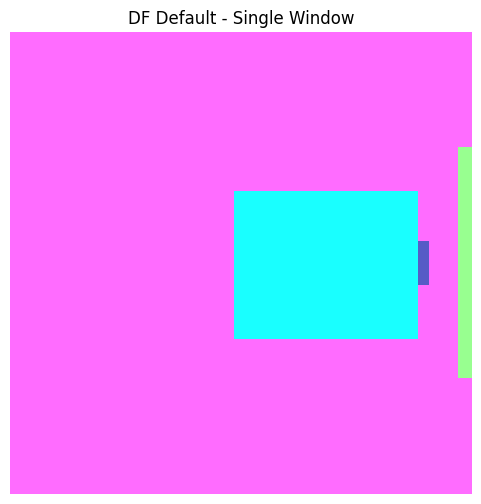

In [130]:
# Load payload from JSON file
with open("../assets/df_default_single.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_df_default.png").write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

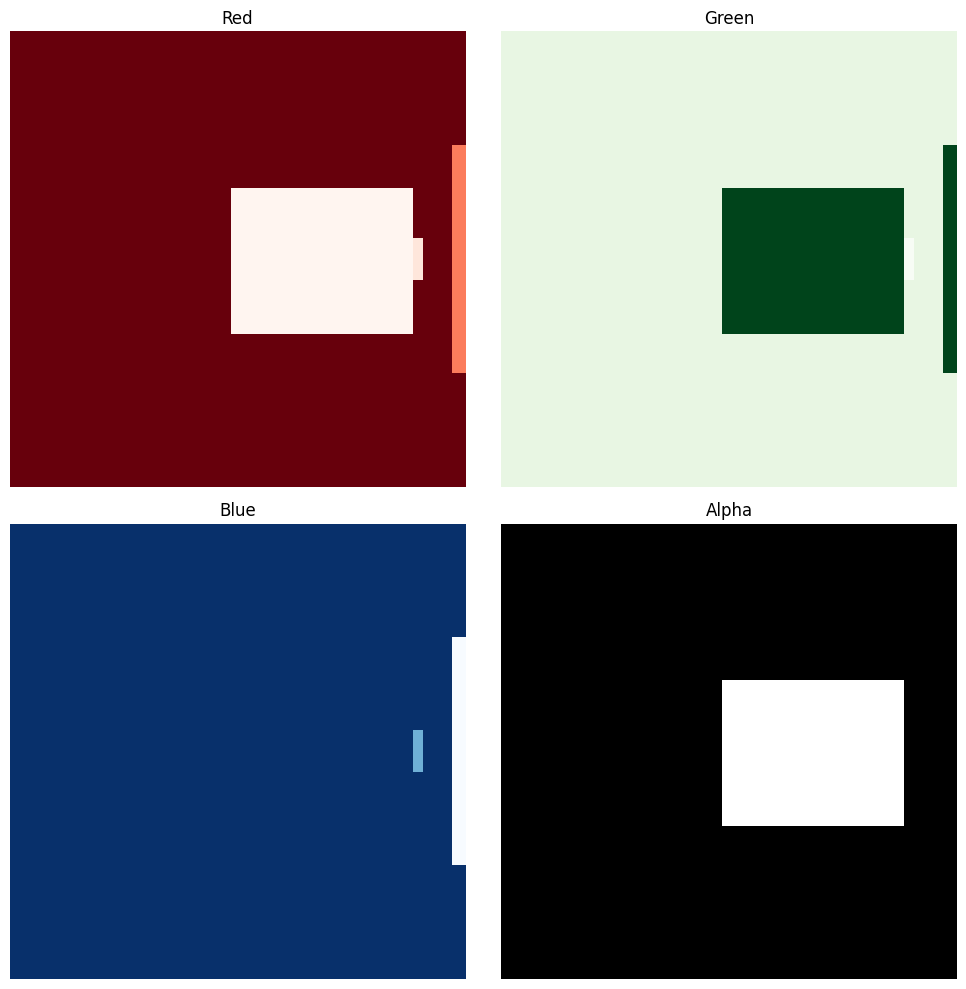

In [132]:
utils.show_individual_channels("encoded_df_default")

## 👉 Multiwindow

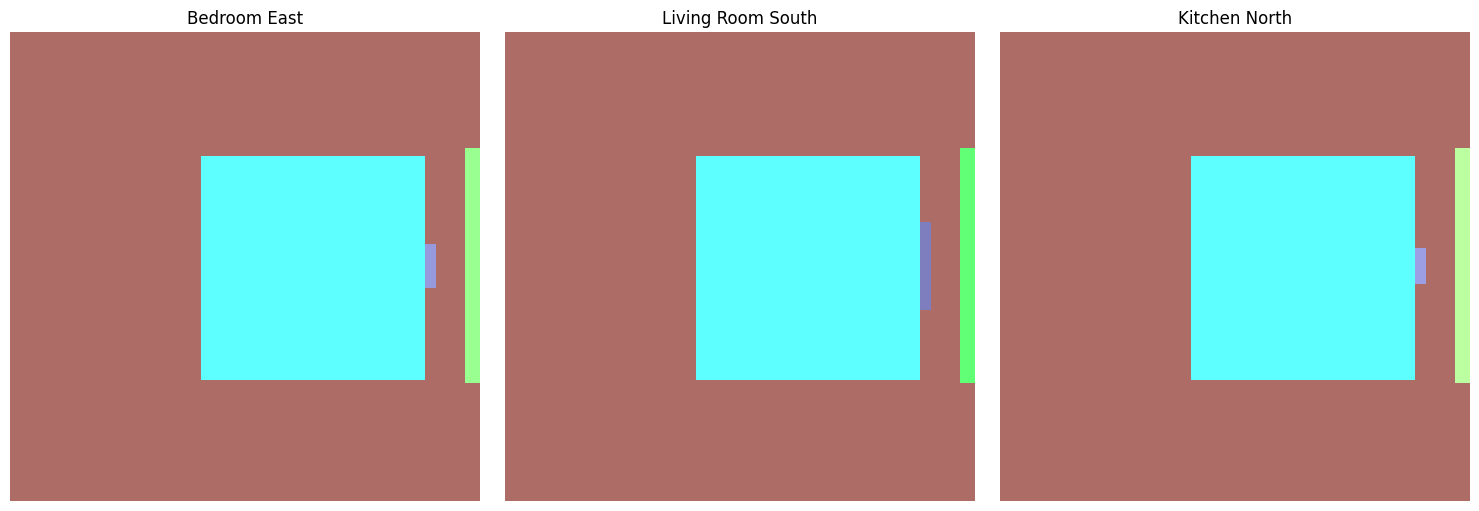

In [134]:
# Load multi-window payload from JSON file
with open("../assets/df_custom_multi_window.json") as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("encoded_multi_window.zip").write_bytes(response.content)
    
    images = {}
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        for name in z.namelist():
            images[name.replace('.png', '')] = Image.open(io.BytesIO(z.read(name)))
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for idx, (window_id, img) in enumerate(images.items()):
        axes[idx].imshow(img)
        axes[idx].set_title(window_id.replace("_", " ").title())
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

## 👉 DA single window

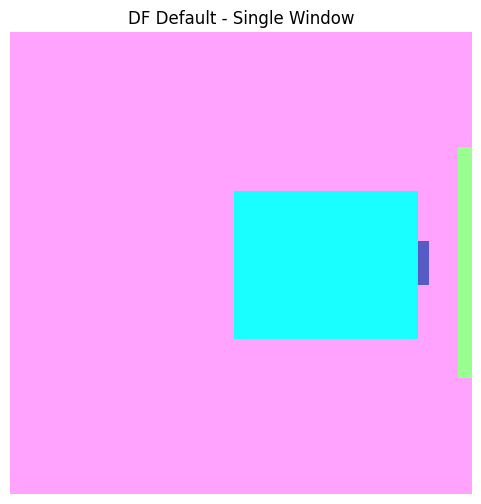

In [135]:
# Load payload from JSON file
inp_file = "da_default_single"
with open("../assets/{}.json".format(inp_file)) as f:
    payload = json.load(f)

response = requests.post(f"{SERVER_URL}/encode", json=payload)

if response.status_code == 200:
    Path("{}.png".format(inp_file)).write_bytes(response.content)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("DF Default - Single Window")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Error: {response.status_code}")

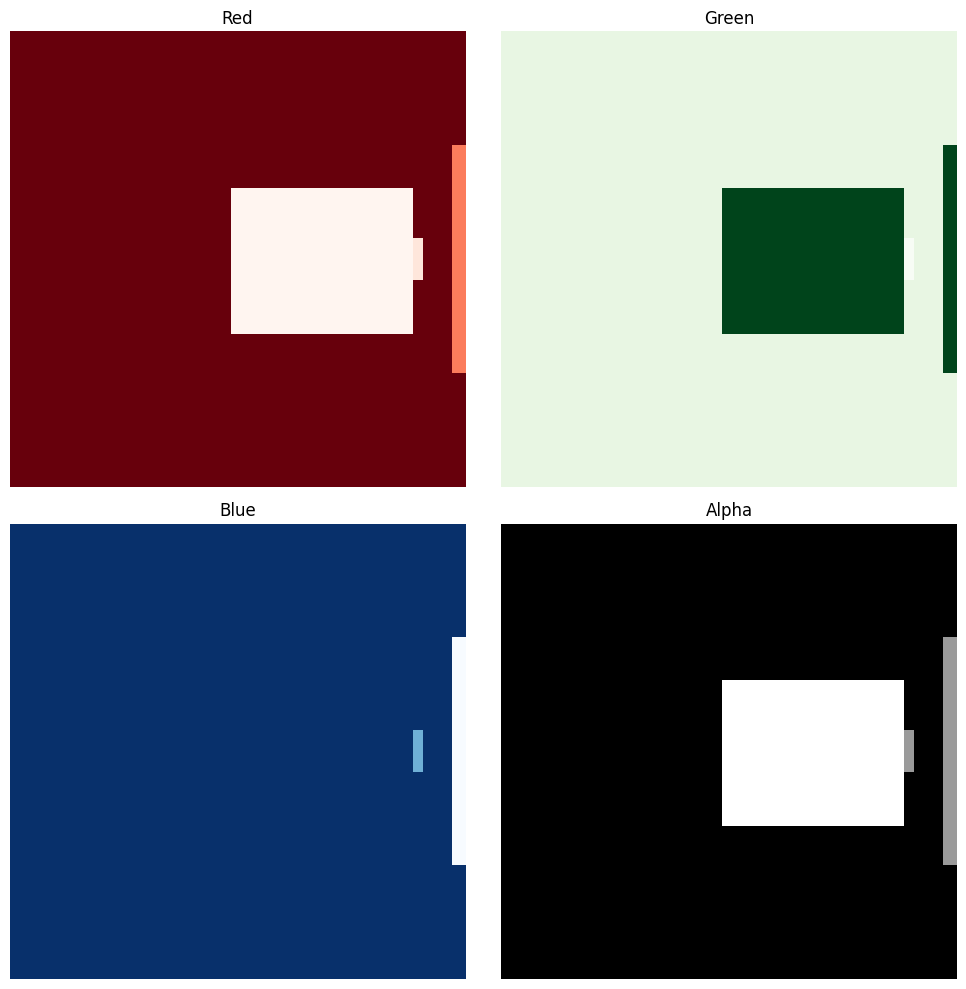

In [136]:
utils.show_individual_channels(inp_file)